# 06wk-025: 취업(다중공선성) / Lasso

최규빈  
2023-10-05

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-wvjYdDl50TvV9cRY4PdSPG&si=Fft31dpXqRsb4tw2>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.linear_model
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [3]:
df

# 4. True (Oracle)

In [4]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 

In [5]:
print(f'train_score:\t{predictr.score(X,y):.4f}')
print(f'test_score:\t{predictr.score(XX,yy):.4f}')

train_score:    0.9133
test_score: 0.9127

# 5. Baseline

`-` 모든 변수를 활용하여 회귀모형으로 적합 $\to$ 최악의 결과

In [6]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 


`-` 평가

In [7]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     1.0000
test_score:  0.1171

# 6. Lasso

`-` Lasso를 이용

In [8]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Lasso(alpha=1)
## step3
predictr.fit(X,y)
## step4 : pass 

`-` 평가

In [9]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     0.8600
test_score:  0.8306

# 7. Lasso는 왜 결과를 좋게 만들까?

## A. 정확한 설명

`-` 어려워요..

## B. 직관적 설명 (엄밀하지 않은 설명)

`-` 느낌: 몇 개의 toeic coef들로 쉽게 0.01을 만들게 해서는 안된다.

-   아이디어1: 0.01을 **동일한 값으로 균등하게 배분한다**. – Ridge,
    L2-penalty
-   아이디어2: 아주 적은숫자의 coef만을 살려두고 나머지 coef값은 0으로
    강제한다. – Lasso, L1-penalty

`-` 계수값이 0이라는 의미: 그 변수를 제거한것과 같은 효과

`-` 아이디어2의 기원: `y ~ toeic + gpa` 가 트루이지만,
`y ~ toeic0 + gpa` 으로 적합해도 괜찮잖아?

`-` 진짜 학습된 계수값이 대부분 0인지 확인해보자.

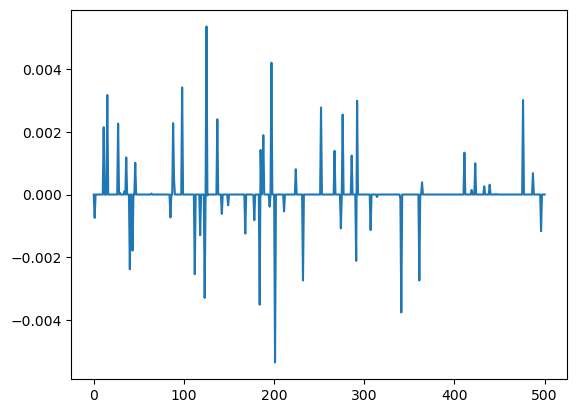

In [10]:
plt.plot(predictr.coef_[1:])

## C. $\alpha$ 에 따른 변화 관찰

`-` 여러개의 predictor 학습

In [11]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
alphas = np.linspace(0,2,100)
predictrs = [sklearn.linear_model.Lasso(alpha=alpha) for alpha in alphas]
## step3
for predictr in predictrs: 
    predictr.fit(X,y)
## step4 : pass 

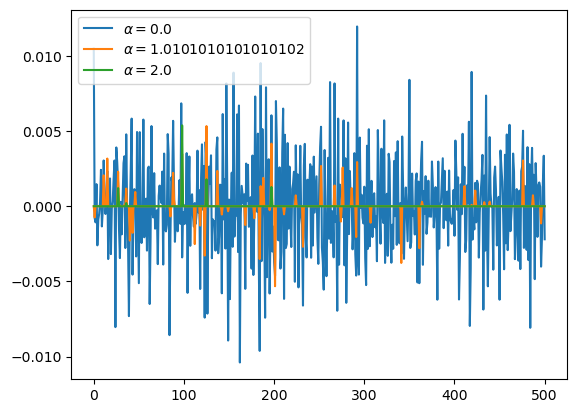

In [12]:
plt.plot(predictrs[0].coef_[1:],label=r'$\alpha={}$'.format(predictrs[0].alpha))
plt.plot(predictrs[50].coef_[1:],label=r'$\alpha={}$'.format(predictrs[50].alpha))
plt.plot(predictrs[-1].coef_[1:],label=r'$\alpha={}$'.format(predictrs[-1].alpha))
plt.legend()

`-` predictor 들의 toeic 계수합은 여전히 0.01 근처

In [13]:
print(f'alpha={predictrs[0].alpha:.4f}\tsum(toeic_coef)={predictrs[0].coef_[1:].sum()}')
print(f'alpha={predictrs[50].alpha:.4f}\tsum(toeic_coef)={predictrs[50].coef_[1:].sum()}')
print(f'alpha={predictrs[-1].alpha:.4f}\tsum(toeic_coef)={predictrs[-1].coef_[1:].sum()}')

alpha=0.0000    sum(toeic_coef)=0.010291301406468518
alpha=1.0101    sum(toeic_coef)=0.009986115762478664
alpha=2.0000    sum(toeic_coef)=0.009864586871194559

`-` number of non-zero coefs 를 시각화

In [14]:
non_zero_coefs = [(abs(predictr.coef_[1:])>0).sum() for predictr in predictrs]

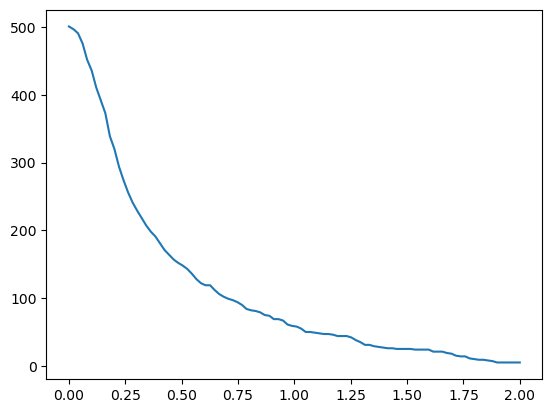

In [15]:
plt.plot(alphas,non_zero_coefs)

## D. coef를 0으로 만드는 수학적 장치

`-` Ridge(복습): coef의 값들을 엔빵하는 수학적 장치

-   패널티: 유사토익들의 계수값을 제곱한뒤 합치고(=L2-norm을 구하고), 그
    값이 0에서 떨어져 있을 수록 패널티를 줄꺼야!

`-` Lasso: coef의 값들을 대부분 0으로 만드는 수학적 장치

-   패널티: 유사토익들의 계수값의 절대값을 구한뒤에 합치고(=L1-norm을
    구하고), 그 값이 0에서 떨어져 있을 수록 패널티를 줄꺼야!

`-` 사실 L1, L2 패널티에 따라서 이러한 결과가 나오는 것은 이해하기
어렵다. (그래서 취업/대학원 진학시 단골질문중 하나)